## **Boston Housing Agency**



# Housing Project Lab

In [50]:
import pandas as pd
import statsmodels.api as sm
import scipy.stats
import seaborn as sns


In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## *Task Generate Descriptive Statistics and Visualizations*

#### For the "Median value of owner-occupied homes" provide a boxplot


/Users/madyanabdo/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 0, 'Median value of ownder-occupied homes')]

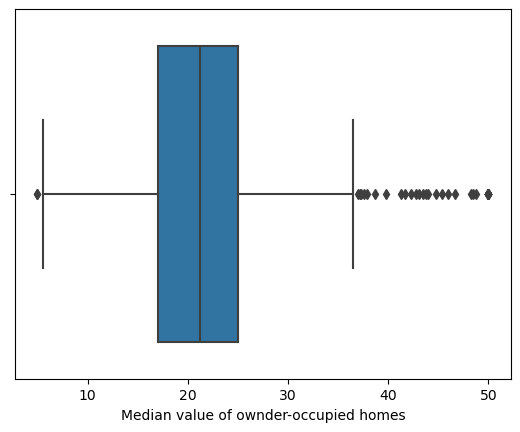

In [85]:
# ax=sns.boxplot(data=boston_df,x='MEDV')
ax=sns.boxplot(x='MEDV',data=boston_df)
ax.set(xlabel='Median value of ownder-occupied homes')

we can see that the median values is between 15k and 25k and we have some outliers values more than 35k


#### Provide a  bar plot for the Charles river variable


/Users/madyanabdo/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/madyanabdo/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/madyanabdo/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/madyanabdo/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

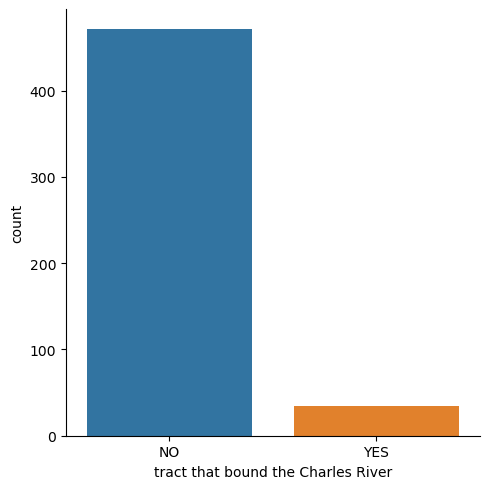

In [87]:
boston_df.loc[(boston_df['CHAS']==0,'tract_river')]='NO'
boston_df.loc[(boston_df['CHAS']==1,'tract_river')]='YES'

ax=sns.catplot(x='tract_river',data=boston_df,kind='count')
ax.set(xlabel='tract that bound the Charles River')

we can see that most don't tract the Charles River


#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


/var/folders/2x/35hk249n05546k_yrv48xmv80000gn/T/ipykernel_976/155477974.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '35 and younger' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  boston_df.loc[(boston_df['AGE']<=35),'age_group']='35 and younger'
/Users/madyanabdo/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/madyanabdo/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/madyanabdo/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: Fut

[Text(0.5, 0, 'Median value of ownder-occupied homes')]

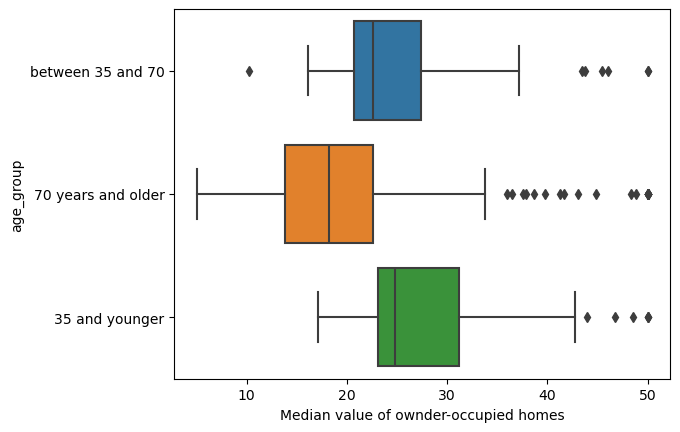

In [55]:
boston_df.loc[(boston_df['AGE']<=35),'age_group']='35 and younger'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70),'age_group']='between 35 and 70'
boston_df.loc[(boston_df['AGE']>=70),'age_group']='70 years and older'

ax=sns.boxplot(x='MEDV',y='age_group',data=boston_df)
ax.set(xlabel='Median value of ownder-occupied homes')

we can see that mostly the 35 and younger are having Median value with higher value



#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?



/Users/madyanabdo/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/madyanabdo/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 0, 'non retail business acres per town'),
 Text(0, 0.5, 'Nitric oxide concentrations')]

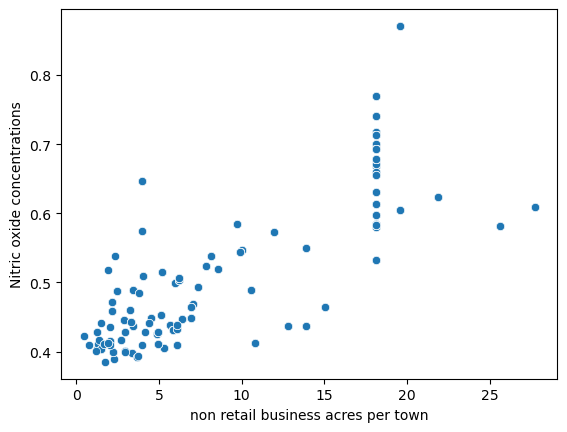

In [91]:
ax=sns.scatterplot(x='INDUS',y='NOX',data=boston_df)
ax.set(xlabel='non retail business acres per town',ylabel='Nitric oxide concentrations')


we can see a clear postivie relation between non retail busniess and Nitric oxide level 

#### Create a histogram for the pupil to teacher ratio variable

/Users/madyanabdo/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/madyanabdo/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'pupil-teacher ratio by town')]

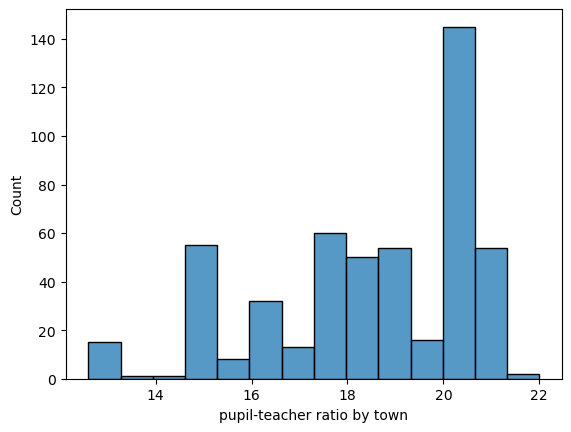

In [134]:

ax=sns.histplot(x='PTRATIO',data=boston_df)
ax.set(xlabel='pupil-teacher ratio by town')

## *Task Use the appropriate tests to answer the questions provided*

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)





In [29]:
x=boston_df[boston_df['CHAS']==1]['MEDV']
y=boston_df[boston_df['CHAS']==0]['MEDV']
scipy.stats.levene(x,y,center='mean')
# we rejct the null hypnonthese and there is difference between the mean for the two groups.

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [38]:
scipy.stats.ttest_ind(x,y,equal_var=False)
#the p value is less than .05% so we can reject the null and there is difference between the two groups


TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

there is enough statistical evidence that there is a difference between median prices of houses with bounded by river or not

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [73]:
thirtyfive_and_younger=boston_df[boston_df['age_group']=='35 and younger']['MEDV']
between_36_70=boston_df[boston_df['age_group']=='between 35 and 70']['MEDV']
seventy_and_older = boston_df[boston_df['age_group']=='70 years and older']["MEDV"]

f_statistics, p_value = scipy.stats.f_oneway(thirtyfive_and_younger,between_36_70,seventy_and_older)
print('f statistics: {0} p value {1}'.format(f_statistics,p_value))

f statistics: 36.40764999196599 p value 1.7105011022702984e-15


#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [49]:
scipy.stats.pearsonr(boston_df['CHAS'],boston_df['NOX'])


PearsonRResult(statistic=0.09120280684249511, pvalue=0.040290500972827395)

the p value is less than .05% so we can reject the null and conclude that there is significat evedance that there is a relation between Nitric oxide and the proportion of non retail business per town 

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [54]:
x=boston_df['DIS']
y=boston_df['MEDV']
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        19:55:16   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

every additional weighted distance to the five Boston employment centres will have 1.09 addiotional value
